#### Mouse Cancer Studies: Observations and Insights

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [27]:
# Establish the csv file paths 
mouse_metadata_path = "/Users/ashleypatricia/Documents/GitHub/Matplotlib-challenge/Mouse_metadata.csv"
study_results_path = "/Users/ashleypatricia/Documents/GitHub/Matplotlib-challenge/Pymaceuticals_data_Study_results.csv"

# Read the mouse data as csv files and convert them to dataframes
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)
print(mouse_metadata_df.head())
print(study_results_df.head())

# Combine the data into a single dataframe 
merged_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID", how="outer")

  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


In [29]:
# Check the number of mice (without considering duplicates)
totmice = merged_df["Mouse ID"].count()
print(f"The total number of mice involved in the study, not considering duplicates, is {totmice}.")

# Checking the unique number of mice
unique = merged_df["Mouse ID"].unique()
micenum = len(unique)
print(f"The unique number of mice included in the study is {micenum}.")



The total number of mice involved in the study, not considering duplicates, is 1893.
The unique number of mice included in the study is 249.


In [31]:
# Getting info on the duplicate mice by ID number (for Mouse ID and Timepoint) 
dropped_results = merged_df[merged_df.duplicated(subset=["Mouse ID", "Timepoint"])]

# See which mice are duplicated in the dataset 
dropped_results["Mouse ID"].value_counts()

g989    5
Name: Mouse ID, dtype: int64

In [33]:
# Optional: Get all the data for the duplicate mouse ID. 
dropped_data = merged_df.loc[merged_df["Mouse ID"] == "g989", :]
dropped_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [35]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropped_results_df = merged_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
dropped_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [37]:
# Checking the number of mice in the clean DataFrame.
clean = merged_df.loc[merged_df["Mouse ID"] != "g989", :]
clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


## Summary Statistics

In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Find the value counts of each regimen
regimen = clean["Drug Regimen"].unique()
regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
regimine_mean = clean.groupby(by="Drug Regimen")["Tumor Volume (mm3)"].mean()
regimine_median = clean.groupby(by="Drug Regimen")["Tumor Volume (mm3)"].median()
regimine_var = clean.groupby(by="Drug Regimen")["Tumor Volume (mm3)"].var()
regimine_std = clean.groupby(by="Drug Regimen")["Tumor Volume (mm3)"].std()
regimine_sem = clean.groupby(by="Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
stats_df = pd.DataFrame({"Tumor Volume Mean": regimine_mean, "Tumor Volume Median": regimine_median, "Tumor Volume Variance": regimine_var, "Tumor Volume St. Dev": regimine_std, "Total Volume SEM": regimine_sem})
stats_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume St. Dev,Total Volume SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.493884,55.591622,70.822755,8.415626,1.717832
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen using the aggregation method (produce the same summary statistics in a single line)
aggregate = clean.groupby(["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
aggregate

Tumor Volume (mm3)                                            
                           mean     median         var        std       sem
Drug Regimen                                                               
Capomulin             36.667568  38.125164   32.663378   5.715188  1.143038
Ceftamin              57.753977  59.851956   69.982735   8.365568  1.673114
Infubinol             58.178246  60.165180   74.010875   8.602957  1.720591
Ketapril              62.806191  64.487812   98.921330   9.945920  1.989184
Naftisol              61.205757  63.283288  106.029927  10.297083  2.059417
Placebo               60.508414  62.030594   78.759797   8.874672  1.774934
Propriva              56.493884  55.591622   70.822755   8.415626  1.717832
Ramicane              36.191390  36.561652   32.166354   5.671539  1.134308
Stelasyn              61.001707  62.192350   90.331586   9.504293  1.940056
Zoniferol             59.181258  61.840058   76.862027   8.767099  1.753420

## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Regimen Administrations Per Regimen'}, xlabel='Regimen', ylabel='Number of Times Administered'>

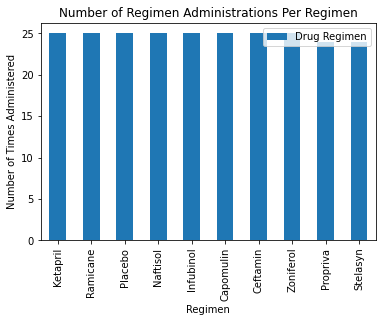

In [43]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen = clean["Drug Regimen"].unique()
regimen2 = clean["Drug Regimen"].value_counts()

plotdata_df = pd.DataFrame({"Drug Regimen": regimen2})
plotdata_df.plot(kind="bar", title="Number of Regimen Administrations Per Regimen", ylabel="Number of Times Administered", xlabel="Regimen")



<function matplotlib.pyplot.show(close=None, block=None)>

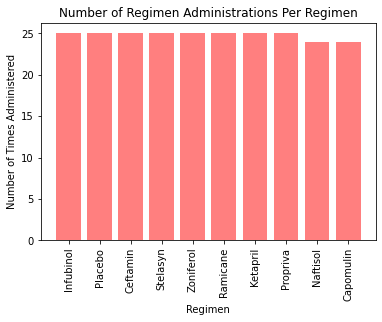

In [44]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
regimen = clean["Drug Regimen"].unique()
regimen2 = clean["Drug Regimen"].value_counts()

plt.bar(regimen, regimen2, color="r", alpha=0.5, align="center")
plt.title("Number of Regimen Administrations Per Regimen")
plt.xlabel("Regimen")
plt.ylabel("Number of Times Administered")
plt.xticks(regimen, rotation="vertical")
plt.show


<AxesSubplot:title={'center':'Proportion of Male and Female Mice'}, ylabel='Sex'>

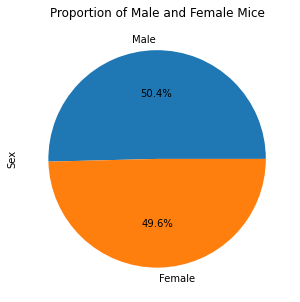

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex_df = clean["Sex"].value_counts()
mouse_sex_df.plot.pie(y="Sex", figsize=(5, 5), title="Proportion of Male and Female Mice", autopct="%1.1f%%")

Text(0.5, 1.0, 'Proportion of Male and Female Mice')

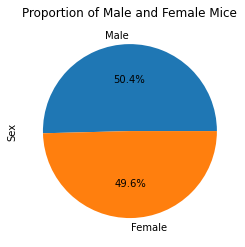

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
mouse_sex = clean["Sex"].value_counts()
plt.ylabel("Sex")
plt.pie(mouse_sex, labels=labels, autopct="%1.1f%%")
plt.title("Proportion of Male and Female Mice")


## Quartiles, Outliers and Boxplots

In [47]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
groupedmice = clean.groupby(["Mouse ID"])
timepoints_df = pd.DataFrame(groupedmice["Timepoint"].max()).reset_index()
timepoints_df

# Check the number of each max timepoint 
#print(timepoints_df["Timepoint"].value_counts())

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(clean, timepoints_df, on=["Mouse ID", "Timepoint"], how="right")
merged_df

# Drop duplicates of Mouse IDs
dup_df = merged_df.drop_duplicates("Mouse ID")
dup_df["Drug Regimen"].value_counts()

# See if value counts here match above
#print(dup_df["Timepoint"].value_counts())


# Keep all rows that are Capomulin, Ramicane, Infubinol, and Ceftamin
regimen1_df = dup_df.loc[dup_df["Drug Regimen"] == "Capomulin", :]
regimen2_df = dup_df.loc[dup_df["Drug Regimen"] == "Ramicane", :]
regimen3_df = dup_df.loc[dup_df["Drug Regimen"] == "Infubinol", :]
regimen4_df = dup_df.loc[dup_df["Drug Regimen"] == "Ceftamin", :]


# Put previous dataframes into one list 
dflist = [regimen1_df, regimen2_df, regimen3_df, regimen4_df]

# Convert the list into one data frame 
final_df = pd.concat(dflist)
final_df
# Check value counts for each regimen 
#final_df["Drug Regimen"].value_counts()





,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
19,b128,Capomulin,Female,9,22,45,38.982878,2
24,b742,Capomulin,Male,7,21,45,38.939633,0
61,f966,Capomulin,Male,16,17,20,30.485985,0
64,g288,Capomulin,Male,3,19,45,37.074024,1
66,g316,Capomulin,Female,22,22,45,40.159220,2
...,...,...,...,...,...,...,...,...
223,x226,Ceftamin,Male,23,28,0,45.000000,0
228,x581,Ceftamin,Female,19,28,45,64.634949,3
231,x822,Ceftamin,Male,3,29,45,61.386660,3
238,y769,Ceftamin,Female,6,27,45,68.594745,4


In [48]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Keep just the "Drug Regimen" and "Tumor Volume (mm3)"" columns 
fin_df = final_df[["Drug Regimen", "Tumor Volume (mm3)"]]
fin_df

# Create empty list to fill with tumor vol data (for plotting)
emptytumorvol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    drug_df = fin_df.loc[final_df["Drug Regimen"] == treatment]
    fin_vol = drug_df["Tumor Volume (mm3)"]
    emptytumorvol.append(fin_vol)
emptytumorvol[0]

# Find the IQR for each of the regimens
for i in range(4):
    quartiles = emptytumorvol[i].quantile([.25,.5,.75])
    lower = quartiles[.25]
    upper = quartiles[.75]
    iqr = upper-lower
    print(f"The interquartile range of tumor volume for {treatments[i]} is: {iqr}")

    # Find lower and upper bounds for each 
    lower_bound = lower - (1.5*iqr)
    upper_bound = upper + (1.5*iqr)
    print(f"For {treatments[i]}, values above {upper_bound} could be outliers")
    print(f"For {treatments[i]}, values below {lower_bound} could be outliers")

    # Find outliers for each 
    outliers1 = emptytumorvol[i].loc[(emptytumorvol[i] < lower_bound)] 
    outliers2 = emptytumorvol[i].loc[(emptytumorvol[i] > upper_bound)]
    print(f"For {treatments[i]}, {outliers1} and {outliers2} are outliers")

The interquartile range of tumor volume for Capomulin is: 7.781863460000004
For Capomulin, values above 51.83201549 could be outliers
For Capomulin, values below 20.70456164999999 could be outliers
For Capomulin, Series([], Name: Tumor Volume (mm3), dtype: float64) and Series([], Name: Tumor Volume (mm3), dtype: float64) are outliers
The interquartile range of tumor volume for Ramicane is: 9.098536719999998
For Ramicane, values above 54.30681135 could be outliers
For Ramicane, values below 17.912664470000003 could be outliers
For Ramicane, Series([], Name: Tumor Volume (mm3), dtype: float64) and Series([], Name: Tumor Volume (mm3), dtype: float64) are outliers
The interquartile range of tumor volume for Infubinol is: 11.477135160000003
For Infubinol, values above 82.74144559000001 could be outliers
For Infubinol, values below 36.83290494999999 could be outliers
For Infubinol, 31    36.321346
Name: Tumor Volume (mm3), dtype: float64 and Series([], Name: Tumor Volume (mm3), dtype: float6

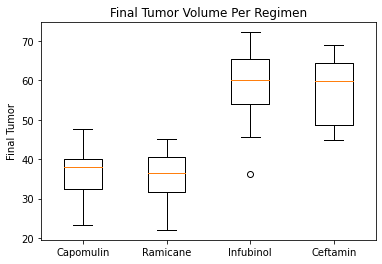

In [49]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.boxplot(emptytumorvol)
ax1.set_title("Final Tumor Volume Per Regimen")
ax1.set_ylabel("Final Tumor")
plt.xticks(ticks=[1,2,3,4],labels=treatments)
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

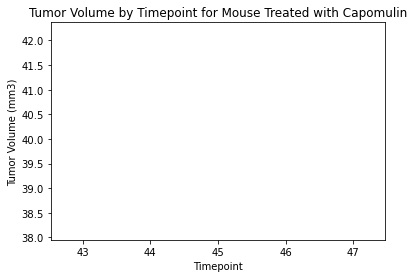

In [50]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Get only mice that were treated with Capomulin
cap_df = clean.loc[clean["Drug Regimen"] == "Capomulin", :]
#print(cap_df)

# Choose random mouse
mouse_df = cap_df.loc[cap_df["Mouse ID"] == "g316", :]
mouse_df

# Only keep Timepoint and Tumor Volume (mm3) columns
fin1_df = mouse_df[["Timepoint", "Tumor Volume (mm3)"]]

# Indicate the x and y values
x_value = mouse_df["Timepoint"]
y_value = mouse_df["Tumor Volume (mm3)"]

# Plot 
plt.plot(x_value, y_value)
plt.title("Tumor Volume by Timepoint for Mouse Treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show



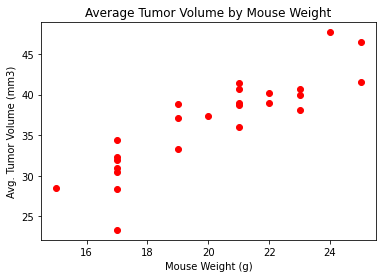

In [51]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Retreive only mice that were treated with Capomulin
cap_df = clean.loc[clean["Drug Regimen"] == "Capomulin", :]
cap_df

# Calculate average tumor volume and mouse weight 
avgtumorvol = cap_df.groupby(by="Mouse ID")["Tumor Volume (mm3)"].mean()
weight = cap_df.groupby(by="Mouse ID")["Weight (g)"].mean()

# Plot
plt.scatter(weight, avgtumorvol, marker="o", color="red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg. Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Mouse Weight")
plt.show()


## Correlation and Regression

The correlation between weight and average tumor weight is (0.8767060403658116, 9.08442908867345e-09).
The linear regression model is y= 1.75x + 1.45


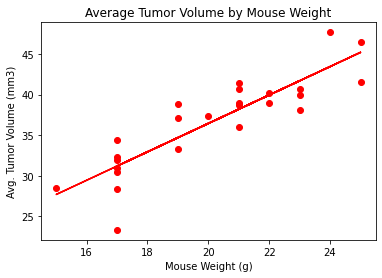

In [62]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Calculate the correlation 
correlation = st.pearsonr(weight, avgtumorvol)
print(f"The correlation between weight and average tumor weight is {correlation}.")

# Calculate the linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, avgtumorvol)
regress_values = weight * slope + intercept 
line_eq = "y= " +str(round(slope, 2)) + "x + " + str(round(intercept, 2))
print(f"The linear regression model is {line_eq}")

# Plot 
plt.scatter(weight, avgtumorvol, marker
="o", color="red")
plt.plot(weight, regress_values, "r-")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg. Tumor Volume (mm3)")
plt.title("Average Tumor Volume by Mouse Weight")
plt.show()
